In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
def convert_time(df):
    df['time'] = pd.to_datetime(df['time'])
    df['time'] = df['time'].dt.date
    return df

In [3]:
def lag(df,columns):  
    for column in columns:
        #if column != 'mood' and column !='id':
        if column !='id':
            df[f'{column}__shift_b_{1}d'] = df[f'{column}'].shift(1)
            df[f'{column}__shift_b_{2}d'] = df[f'{column}'].shift(2)
            df[f'{column}__shift_b_{3}d'] = df[f'{column}'].shift(3)
            df[f'{column}__shift_b_{4}d'] = df[f'{column}'].shift(4)
            df[f'{column}__shift_b_{5}d'] = df[f'{column}'].shift(5)
    return df


In [4]:
def missing_value_(df,option=0):
    df = df.fillna(df.interpolate())
    df = df.dropna(subset=['mood'])  

    df = df.fillna(0)
    return df

In [5]:
def normalization(df):
    for f in df.columns:
        if f == 'mood':
            continue
        fmin = df[f].min()
        fmax = df[f].max()
        df[f] = (df[f] - fmin)/(fmax-fmin)
    return  df

In [6]:
df = pd.read_csv('users_data.csv')

df_list = []
# get 
patient_list = df.id.value_counts().keys()


for patient in patient_list:
    atrributes_list = ['mood', 'circumplex.valence', 'activity', 'circumplex.arousal', 'id']
    # get the data 
    df_patient = df[df.id == patient].set_index('time')

    df_patient = missing_value_(df_patient)

    df_patient = df_patient[atrributes_list]

    df_patient = lag(df_patient, columns=atrributes_list)

    df_list.append(df_patient)

# concatenate the dataframes along axis 1
df_patients = pd.concat(df_list, axis=0)

# create a LabelEncoder object
le = LabelEncoder()
# fit the LabelEncoder object to the  id column and transform the data
df_patients['id_encoded'] = le.fit_transform(df_patients['id'])
# print the result
df_patients = df_patients.drop(columns=['id']).fillna(0)

# feature normalization
df_id = normalization(df_patients)

df_id['mood'] = round(df_id['mood'])

y = list(df_id['mood'])

scaled_data = df_id.drop(columns=['mood'])

X = scaled_data.to_numpy()


In [7]:
X.shape,len(y)

((1331, 24), 1331)

# decision tree

Acc 0.625
precision: 0.625
recall: 0.625
F1: 0.625
r2: 0.33458979191507365


/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


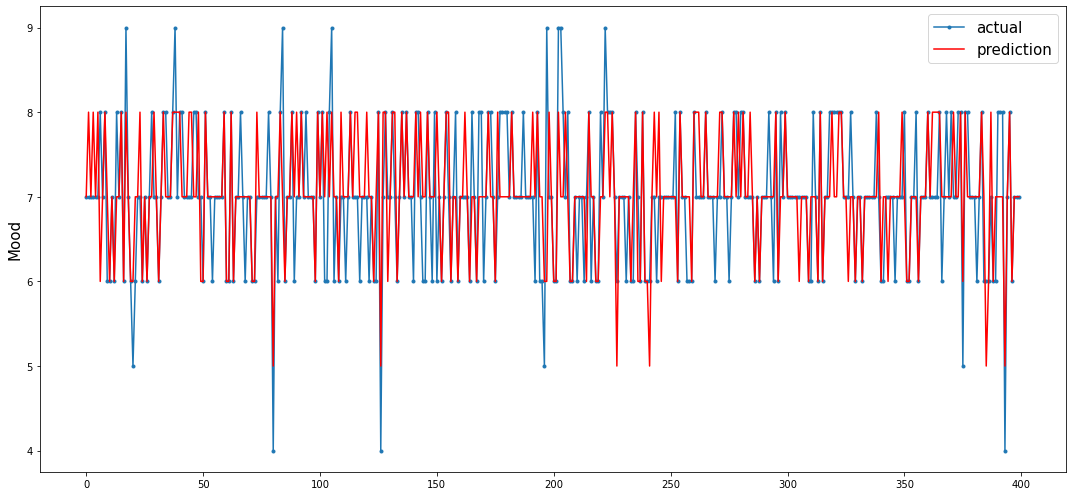

/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metri

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier(max_depth=4)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print('Acc',metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',average='micro'))
print("recall:",metrics.recall_score(y_test, y_pred,pos_label='positive',average='micro'))
print("F1:",metrics.f1_score(y_test, y_pred,pos_label='positive',average='micro'))
print("r2:",metrics.r2_score(y_test, y_pred))

plt.figure(figsize=(15, 7))
aa=[x for x in range(len(y_test))]
plt.plot(aa, y_test, marker='.', label="actual")
plt.plot(aa, y_pred, 'r', label="prediction")
plt.ylabel('Mood', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.tight_layout()

plt.show()



res_dic = {}
res_dic['acc'] = metrics.accuracy_score(y_test, y_pred)
res_dic['precision'] = metrics.precision_score(y_test, y_pred,pos_label='positive',average='weighted')
res_dic['recall'] = metrics.recall_score(y_test, y_pred,pos_label='positive',average='weighted')
res_dic['F1'] = metrics.f1_score(y_test, y_pred,pos_label='positive',average='weighted')
res_dic['model'] = ['Decision Tree']
results_df = pd.DataFrame(res_dic,index = [0,1,2,3,4])

# logistic regression

/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Acc 0.5975
precision: 0.5975
recall: 0.5975
F1: 0.5975
r2: 0.28843417054502096


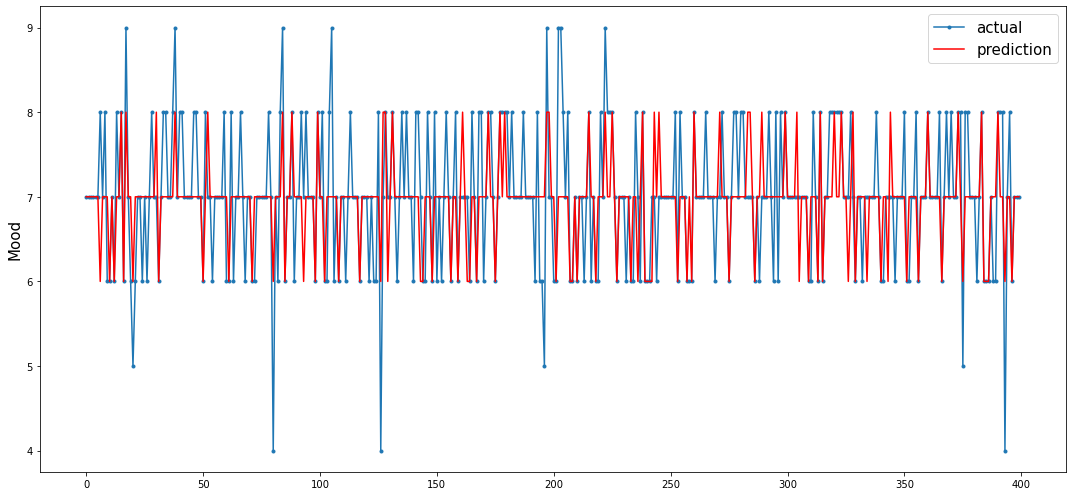

/Users/qidingran/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qid

In [9]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

logreg = LogisticRegression(solver='newton-cg', random_state=0)

logreg.fit(X_train, y_train)
    
y_pred = logreg.predict(X_test)

print('Acc',metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',average='micro'))
print("recall:",metrics.recall_score(y_test, y_pred,pos_label='positive',average='micro'))
print("F1:",metrics.f1_score(y_test, y_pred,pos_label='positive',average='micro'))
print("r2:",metrics.r2_score(y_test, y_pred))

plt.figure(figsize=(15, 7))
aa=[x for x in range(len(y_test))]
plt.plot(aa, y_test, marker='.', label="actual")
plt.plot(aa, y_pred, 'r', label="prediction")
plt.ylabel('Mood', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.tight_layout()

plt.show()

i = 1
results_df['acc'].iloc[i] = metrics.accuracy_score(y_test, y_pred)
results_df['precision'].iloc[i] = metrics.precision_score(y_test, y_pred,pos_label='positive',average='weighted')
results_df['recall'].iloc[i] = metrics.recall_score(y_test, y_pred,pos_label='positive',average='weighted')
results_df['F1'].iloc[i] = metrics.f1_score(y_test, y_pred,pos_label='positive',average='weighted')
results_df['model'].iloc[i] = 'logistic regression'

# SVM

/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Acc 0.66
precision: 0.66
recall: 0.66
F1: 0.66
r2: 0.4307473364360168


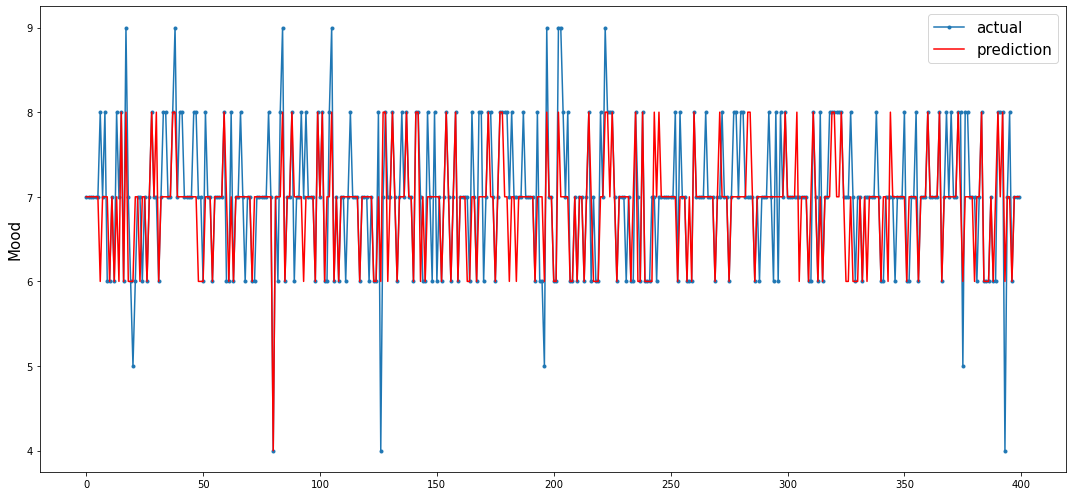

/Users/qidingran/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/qidingran/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qid

In [10]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

svc=SVC(kernel='linear', C=5)
    
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Acc',metrics.accuracy_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',average='micro'))
print("recall:",metrics.recall_score(y_test, y_pred,pos_label='positive',average='micro'))
print("F1:",metrics.f1_score(y_test, y_pred,pos_label='positive',average='micro'))
print("r2:",metrics.r2_score(y_test, y_pred))
plt.figure(figsize=(15, 7))
aa=[x for x in range(len(y_test))]
plt.plot(aa, y_test, marker='.', label="actual")
plt.plot(aa, y_pred, 'r', label="prediction")
plt.ylabel('Mood', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.tight_layout()

plt.show()

i = 2
results_df['acc'].iloc[i] = metrics.accuracy_score(y_test, y_pred)
results_df['precision'].iloc[i] = metrics.precision_score(y_test, y_pred,pos_label='positive',average='weighted')
results_df['recall'].iloc[i] = metrics.recall_score(y_test, y_pred,pos_label='positive',average='weighted')
results_df['F1'].iloc[i] = metrics.f1_score(y_test, y_pred,pos_label='positive',average='weighted')
results_df['model'].iloc[i] = 'SVM'

In [11]:
i = 3
results_df['precision'].iloc[i] = 0.4493
results_df['recall'].iloc[i] = 0.4424
results_df['F1'].iloc[i] = 0.5376
results_df['acc'].iloc[i] = 0.5526
results_df['model'].iloc[i] = 'LSTM for all'

i = 4
results_df['precision'].iloc[i] = 0.3593
results_df['recall'].iloc[i] = 0.522
results_df['F1'].iloc[i] = 0.4128
results_df['acc'].iloc[i] = 0.522
results_df['model'].iloc[i] = 'LSTM for each id'

In [12]:
results_df

,acc,precision,recall,F1,model
0,0.6250,0.623633,0.6250,0.615693,Decision Tree
1,0.5975,0.581108,0.5975,0.553044,logistic regression
2,0.6600,0.648572,0.6600,0.634546,SVM
3,0.5526,0.449300,0.4424,0.537600,LSTM for all
4,0.5220,0.359300,0.5220,0.412800,LSTM for each id


In [13]:
para = pd.read_csv('wandb_export_2023-04-23T19_02_24.965+02_00.csv')
para = para.drop(columns = ['Step'])

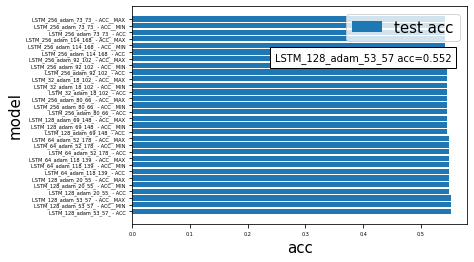

In [14]:
para = pd.read_csv('wandb_export_2023-04-23T19_02_24.965+02_00.csv')
para = para.drop(columns = ['Step'])

aa = list(para.columns)
plt.rcParams['font.size'] = 5
plt.barh(aa,list(para.iloc[0]),label = 'test acc')
plt.ylabel('model', size=15)
plt.xlabel('acc', size=15)
plt.legend(fontsize=15)
plt.text(0.4,24,'LSTM_128_adam_53_57 acc='+str(0.552),
         fontsize=10,
         color="black",
         verticalalignment ='top',
         horizontalalignment ='center',
         bbox ={'facecolor':'white',
                'pad':5}
        )
plt.show()
#plt.savefig('lstm search para.pdf',dpi = 200,bbox_inches = 'tight')